In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 0 if x=='normal' else 1)
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [4]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [5]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
df['land'] = df['land'].astype('category')
df['wrongfragment'] = df['wrongfragment'].astype('category')
df['urgent'] = df['urgent'].astype('category')
#df['numfailedlogins'] = df['numfailedlogins'].astype('category')
df['loggedin'] = df['loggedin'].astype('category')
df['rootshell'] = df['rootshell'].astype('category')
df['suattempted'] = df['suattempted'].astype('category')
df['numshells'] = df['numshells'].astype('category')
df['ishostlogin'] = df['ishostlogin'].astype('category')
df['isguestlogin'] = df['isguestlogin'].astype('category')

In [6]:
# Host count of flags
df['serror'] = df['count']*df['serrorrate']
df['rerror'] = df['count']*df['rerrorrate']

# Host srv count of flags
df['srvserror'] = df['srvcount']*df['srvrerrorrate']
df['srvrerror'] = df['srvcount']*df['srvserrorrate']

df['samesrv'] = df['count']*df['samesrvrate']
df['diffsrv'] = df['count']*df['diffsrvrate']

# Host count of flags
df['dsthostserror'] = df['dsthostcount']*df['dsthostserrorrate']
df['dsthostrerror'] = df['dsthostcount']*df['dsthostrerrorrate']

# Host srv count of flags
df['dsthostsrvserror'] = df['dsthostsrvcount']*df['dsthostsrvrerrorrate']
df['dsthostsrvrerror'] = df['dsthostsrvcount']*df['dsthostsrvserrorrate']

df['dsthostsamesrv'] = df['dsthostsrvcount']*df['dsthostsamesrvrate']
df['dsthostdiffsrv'] = df['dsthostsrvcount']*df['dsthostdiffsrvrate']

In [7]:
from sklearn.model_selection import train_test_split
all_attacks = df['attack'].unique()

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in all_attacks:
    # Get data for the current category
    category_data = df[df['attack'] == category]
    # Split into train and test, ensuring each category appears in test
    if len(category_data) > 30:
        category_train, category_test = train_test_split(category_data, test_size=0.2,random_state=42)
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    train_data = pd.concat([train_data,category_train])
    test_data = pd.concat([test_data,category_test])

In [8]:
X_train = train_data.drop(['attack','is_attack','attack_category'],axis=1)
y_train = train_data['is_attack']
X_test = test_data.drop(['attack','is_attack','attack_category'],axis=1)
y_test = test_data['is_attack']

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_columns = ['protocoltype', 'service', 'flag','land','wrongfragment','urgent','loggedin','rootshell','suattempted','numshells',
                       'ishostlogin','isguestlogin']

encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [10]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [11]:
from sklearn.ensemble  import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
#rf = RandomForestClassifier(class_weight='balanced', max_depth=20,
#                       min_samples_split=10, n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

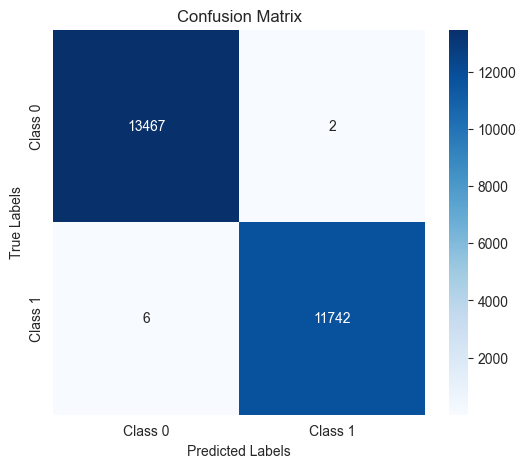

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
y_pred_df = pd.DataFrame(y_pred,index=y_test.index)
y_pred_df.isna().sum()

0    0
dtype: int64

In [14]:
combined_pred = pd.concat([y_test,y_pred_df],axis=1)
combined_pred.columns = ['is_attack','is_attack_pred']
predicted_probabilities = rf.predict_proba(X_test)
combined_pred['predict_prob'] = predicted_probabilities[:, 1]

In [15]:
combined_pred_eq = combined_pred[combined_pred['is_attack'] == combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred[combined_pred['is_attack'] != combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred_uneq[combined_pred_uneq['is_attack'] == 1]
combined_pred = pd.concat([combined_pred_eq,combined_pred_uneq],axis=0)
combined_pred.shape

(25215, 3)

In [16]:
op = pd.merge(X_test,combined_pred,left_index=True,right_index=True)
op = pd.merge(op,df[['attack_category','attack']],left_index=True,right_index=True)
op.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,is_attack,is_attack_pred,predict_prob,attack_category,attack
18091,-0.109305,2.223235,-1.176125,0.751241,-0.007738,-0.005283,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,0.182986,2.168302,-0.637513,-0.632046,-0.374379,-0.374551,0.770809,-0.349259,-0.336107,0.736012,1.258270,1.066453,-0.438899,-0.479495,-0.288563,-0.639305,-0.624803,-0.387852,-0.376434,-0.657064,-0.54098,-0.25174,-0.242122,-0.503688,1.161676,-0.196049,-0.625478,-0.343032,-0.173354,-0.4188,1.304677,-0.292246,0,0,0.0,normal,normal
29741,-0.109305,-0.124695,-0.442350,0.751241,-0.007699,-0.002286,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,1.233741,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.585898,-0.148033,-0.637513,-0.632046,-0.374379,-0.374551,0.770809,-0.349259,-0.374609,0.736012,1.258270,1.066453,-0.438899,-0.479495,-0.288563,-0.639305,-0.624803,-0.387852,-0.376434,0.654599,-0.54098,-0.25174,-0.242122,-0.503688,-0.099830,-0.196049,-0.625478,-0.343032,-0.173354,-0.4188,1.304677,-0.292246,0,0,0.0,normal,normal
76709,-0.109305,2.223235,-1.176125,0.751241,-0.007741,-0.005291,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.725695,-0.368637,-0.637513,-0.632046,-0.374379,-0.374551,0.770809,-0.349259,-0.374609,-1.379091,0.734382,1.066453,-0.438899,2.765990,-0.199825,-0.639305,-0.624803,-0.387852,-0.376434,0.654599,-0.54098,-0.25174,-0.242122,-0.503688,-0.329195,-0.196049,-0.625478,-0.343032,-0.173354,-0.4188,0.800650,-0.292246,0,0,0.0,normal,normal
91928,-0.109305,2.223235,1.086347,0.751241,-0.007729,-0.005278,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.673271,-0.368637,-0.637513,-0.632046,-0.374379,-0.374551,-1.185454,1.260520,-0.374609,0.736012,1.204075,1.021894,-0.385956,-0.479495,-0.288563,-0.639305,-0.624803,-0.387852,-0.376434,-0.657064,-0.54098,-0.25174,-0.242122,-0.503688,-0.329482,-0.155957,-0.625478,-0.343032,-0.173354,-0.4188,1.209259,0.212259,0,0,0.0,normal,normal
39962,-0.098884,2.223235,-1.176125,0.751241,-0.007741,-0.005304,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.708221,-0.313486,-0.637513,-0.632046,-0.374379,-0.374551,-0.753256,3.369886,1.165466,-1.207868,-0.755989,-0.002954,-0.174186,-0.414585,-0.288563,-0.639305,-0.624803,-0.387852,-0.376434,0.654599,-0.54098,-0.25174,-0.242122,-0.503688,-0.329338,-0.156352,-0.625478,-0.343032,-0.173354,-0.4188,-0.766698,0.031934,0,0,0.0,normal,normal


In [17]:
attacks = op[op['is_attack_pred'] == 1].copy()
attacks['attack_category'].value_counts()

attack_category
dos         8997
scan        2333
access       206
backdoor     193
exploit       13
Name: count, dtype: int64

In [24]:
all_attacks1 = attacks['attack'].unique()

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train1_data = pd.DataFrame()
test1_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in all_attacks1:
    # Get data for the current category
    category_data = attacks[attacks['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) > 30:
        category_train, category_test = train_test_split(category_data, test_size=0.2,random_state=42)
    elif len(category_data) == 1:
        train1_data = pd.concat([train1_data,category_data])
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    train1_data = pd.concat([train1_data,category_train])
    test1_data = pd.concat([test1_data,category_test])

In [25]:
X1_train = train1_data.drop(['attack','is_attack','attack_category'],axis=1)
y1_train = train1_data['attack']
X1_test = test1_data.drop(['attack','is_attack','attack_category'],axis=1)
y1_test = test1_data['attack']

In [26]:
X1_train.drop(['is_attack_pred','predict_prob'],axis=1,inplace=True)
X1_test.drop(['is_attack_pred','predict_prob'],axis=1,inplace=True)

In [27]:
test1_data['attack'].nunique()

19

In [28]:
train1_data['attack'].nunique()

22

In [29]:
target_encoder = LabelEncoder()
y1_train_encoded = target_encoder.fit_transform(y1_train)
y1_test_encoded = target_encoder.transform(y1_test)

In [35]:
cat_labels = [target_encoder.classes_[i] for i in range(len(target_encoder.classes_))]

In [31]:
from sklearn.ensemble  import RandomForestClassifier
rf1 = RandomForestClassifier(class_weight='balanced',random_state=42)
rf1.fit(X1_train, y1_train_encoded)
y_pred1= rf1.predict(X1_test)

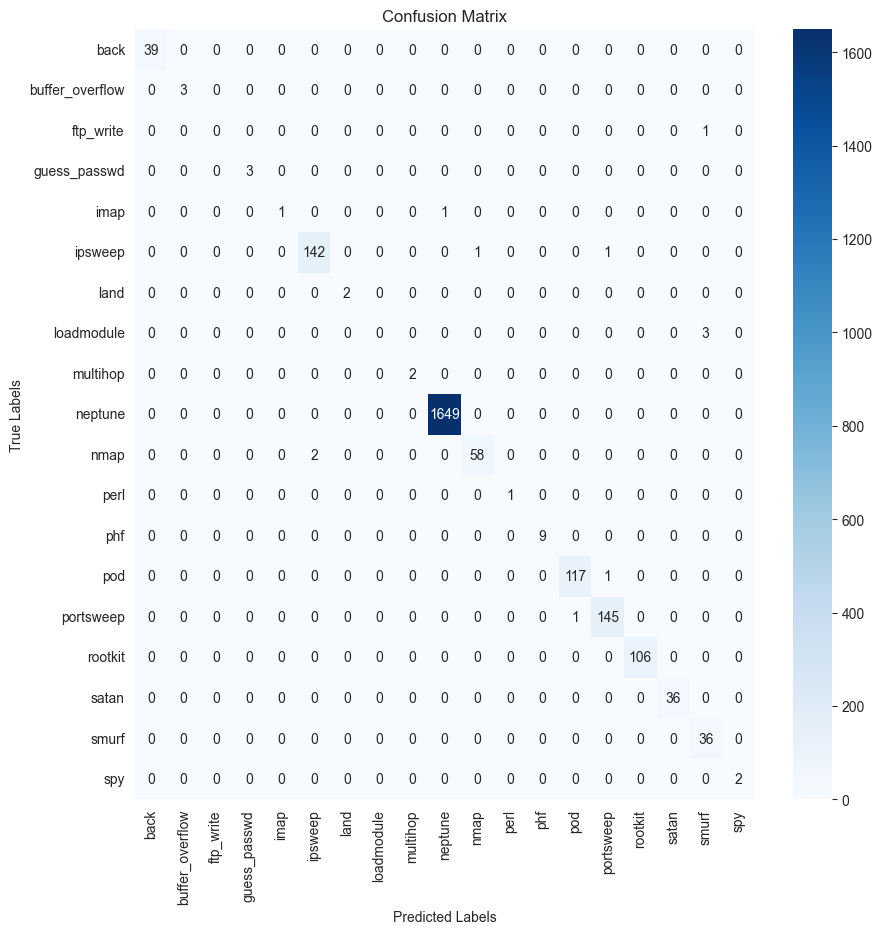

In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y1_test_encoded, y_pred1)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cat_labels[0:-3], yticklabels=cat_labels[0:-3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [46]:
from sklearn.metrics import classification_report
rep = classification_report(y1_test_encoded, y_pred1,target_names=cat_labels[0:-3],output_dict=True)
rep_df = pd.DataFrame(rep).T

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [47]:
rep_df

,precision,recall,f1-score,support
back,1.000000,1.000000,1.000000,39.000000
buffer_overflow,1.000000,1.000000,1.000000,3.000000
ftp_write,0.000000,0.000000,0.000000,1.000000
guess_passwd,1.000000,1.000000,1.000000,3.000000
imap,1.000000,0.500000,0.666667,2.000000
ipsweep,0.986111,0.986111,0.986111,144.000000
land,1.000000,1.000000,1.000000,2.000000
loadmodule,0.000000,0.000000,0.000000,3.000000
multihop,1.000000,1.000000,1.000000,2.000000
neptune,0.999394,1.000000,0.999697,1649.000000
